In [1]:
import pandas as pd 

df_base = pd.read_csv('data/data_to_simulate.csv', index_col=0)
df_base.dropna(inplace=True)
print(df_base.columns)
columns = ['GTIME_KI', 'GSTATUS_KI', 'AGE_DON', 'HCV_SEROSTATUS', 'GENDER_DON', 'AGE', 'DIAB',
                'BMI_CALC', 'ETHCAT', 'GENDER', 'COLD_ISCH_KI', 'SERUM_CREAT',
                'CREAT_TRR', 'delta_age', 'HIST_DIABETES_DON', 'HGT_CM_DON_CALC','CREAT_TRRg1.5', 'SERUM_CREATg1.2',
                'COD_CAD_DON', 'WGT_KG_DON_CALC', 'CREAT_DON', 'ETHCAT_DON',
                'HIST_HYPERTENS_DON', 'NON_HRT_DON', 'DIALYSIS_DATE','TX_DATE', 'PT_CODE', 'ABO', 'ABO_DON']

predictors = ['AGE_DON', 'CREAT_TRR', 'HGT_CM_DON_CALC', 'HCV_SEROSTATUS', 'WGT_KG_DON_CALC',
                    'HIST_DIABETES_DON', 'HIST_HYPERTENS_DON', 'COD_CAD_DON', 'ETHCAT_DON', 'ABO_MAT', 
                    'HLAMIS', 'DIALYSIS_DATE', 'AGE', 'DIAB', 'DIALYSIS_DATEle0.0', 'CREAT_TRRg1.5', 'SERUM_CREATg1.2']

donor = df_base[['AGE_DON', 'CREAT_TRR', 'CREAT_TRRg1.5', 'HGT_CM_DON_CALC', 'HCV_SEROSTATUS', 'HIST_DIABETES_DON', 
            'HIST_HYPERTENS_DON', 'ABO_DON', 'AGE_DONge50', 'WGT_KG_DON_CALCl80', 'COD_CAD_DON_2', 'ETHCAT_DON_2']]

print(donor.columns)
donor.to_csv('data/donors.csv')

recipient = df_base[[ 'DIALYSIS_DATE', 'AGE', 'DIAB', 'ETHCAT', 'GENDER', 'ABO', 'DIALYSIS_DATEle0.0']]
recipient.to_csv('data/recipients.csv')

ethcat_mapping = {
    1: "White, Non-Hispanic",
    2: "Black, Non-Hispanic",
    4: "Hispanic/Latino",
    5: "Asian, Non-Hispanic",
    6: "Amer Ind/Alaska Native, Non-Hispanic",
    7: "Native Hawaiian/Other Pacific Islander, Non-Hispanic",
    9: "Multiracial, Non-Hispanic",
}

Index(['GTIME_KI', 'GSTATUS_KI', 'AGE_DON', 'HCV_SEROSTATUS', 'GENDER_DON',
       'AGE', 'DIAB', 'BMI_CALC', 'ETHCAT', 'GENDER', 'COLD_ISCH_KI',
       'SERUM_CREAT', 'ABO_MAT', 'AMIS', 'BMIS', 'DRMIS', 'CREAT_TRR',
       'delta_age', 'HIST_DIABETES_DON', 'HGT_CM_DON_CALC', 'ABO_DON',
       'COD_CAD_DON', 'WGT_KG_DON_CALC', 'CREAT_DON', 'ETHCAT_DON',
       'HIST_HYPERTENS_DON', 'NON_HRT_DON', 'DIALYSIS_DATE', 'TX_DATE',
       'PT_CODE', 'COMPOSITE_DEATH_DATE', 'ABO', 'T', 'Tag_date', 'DIAB_1',
       'DIAB_998', 'HIST_DIABETES_DON_1', 'HIST_DIABETES_DON_998',
       'AGE_DONge50', 'CREAT_TRRg1.5', 'WGT_KG_DON_CALCl80', 'COD_CAD_DON_2',
       'ETHCAT_DON_2', 'DIALYSIS_DATEle0.0'],
      dtype='object')
Index(['AGE_DON', 'CREAT_TRR', 'CREAT_TRRg1.5', 'HGT_CM_DON_CALC',
       'HCV_SEROSTATUS', 'HIST_DIABETES_DON', 'HIST_HYPERTENS_DON', 'ABO_DON',
       'AGE_DONge50', 'WGT_KG_DON_CALCl80', 'COD_CAD_DON_2', 'ETHCAT_DON_2'],
      dtype='object')


In [2]:
real_gender_df = df_base.GENDER.value_counts(normalize=True).reset_index()
real_gender_df.columns = ['gender', 'sample_proportion']
real_gender_df

,gender,sample_proportion
0,M,0.64827
1,F,0.35173


In [3]:
real_ethcat_df = df_base.ETHCAT.value_counts(normalize=True).reset_index()
real_ethcat_df.ETHCAT = real_ethcat_df.ETHCAT.map(ethcat_mapping)
real_ethcat_df.columns = ['ethcat', 'sample_proportion']
real_ethcat_df

,ethcat,sample_proportion
0,"White, Non-Hispanic",0.439416
1,"Black, Non-Hispanic",0.325258
2,Hispanic/Latino,0.159551
3,"Asian, Non-Hispanic",0.053213
4,"Amer Ind/Alaska Native, Non-Hispanic",0.013618
5,"Multiracial, Non-Hispanic",0.004764
6,"Native Hawaiian/Other Pacific Islander, Non-Hi...",0.004180


In [4]:
recipient.ABO.unique()

array(['B', 'A', 'O', 'AB', 'A2', 'A1', 'A1B', 'A2B'], dtype=object)

In [5]:
blood_type_compatibility = {
    "A": ["A", "A1", "A2", "AB", "A1B", "A2B"],
    "A1": ["A", "A1", "A2", "AB", "A1B", "A2B"],
    "A2": ["A", "A1", "A2", "AB", "A1B", "A2B", "B"],
    "B":  ["B", "AB", "A1B", "A2B"],
    "AB": ["AB", "A1B", "A2B"],
    "A1B": ["A1B"],
    "A2B": ["A2B", "AB"],
    "O": ["A", "A1", "A2", "B", "AB", "A1B", "A2B", "O"]
}

In [6]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
path = Path("C:/Users/HP/Desktop/UNOS data/codes/simulation-waitline-unos").resolve()  # Get the absolute path
os.chdir(path)
import pandas as pd
import numpy as np
import scipy as sc
import recipient as rec
import prediction as pred 
import donor as don
from event import Event



In [7]:
def create_list_of_events(n_events = 10000):
    events = Event(number_of_events= n_events, 
                    time_between_arrivals_recipients=4, 
                    time_between_arrivals_donor= 6) #average time in days
    events.create_events()
    return events

In [8]:
TARGET_TIME  = 5 * 365
SIMULATION_TIME = 365*30 
predictor = pred.SurvivalPredictionModel(model_path='models\cox_prop_2511.pkl')
#9.1% leave the list
#theshold_leave_list = 0.091 
recipients_for_initialization = 300
time_before_starting_simulation = 0
released_recipients = []

models\cox_prop_2511.pkl
ok
Model loaded successfully from models\cox_prop_2511.pkl.


<>:3: SyntaxWarning: invalid escape sequence '\c'
<>:3: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HP\AppData\Local\Temp\ipykernel_14060\1261647170.py:3: SyntaxWarning: invalid escape sequence '\c'
  predictor = pred.SurvivalPredictionModel(model_path='models\cox_prop_2511.pkl')


In [9]:
predictor.model.feature_names_in_

array(['AGE_DON', 'CREAT_TRR', 'HGT_CM_DON_CALC', 'HCV_SEROSTATUS',
       'HIST_DIABETES_DON', 'HIST_HYPERTENS_DON', 'DIALYSIS_DATE', 'AGE',
       'DIAB', 'AGE_DONge50', 'CREAT_TRRg1.5', 'WGT_KG_DON_CALCl80',
       'COD_CAD_DON_2', 'ETHCAT_DON_2', 'DIALYSIS_DATEle0.0'],
      dtype=object)

In [10]:
df = pd.DataFrame(columns=['replicate', 'ethcat', 'gender', 'waiting_time', 'mean_survival_time', 'current_time'])
df_leaves = pd.DataFrame(columns=['replicate', 'ethcat', 'gender', 'waiting_time', 'mean_survival_time', 'current_time'])
waiting_time_convergence = []
wait_list_length = []
leave_list_global = []



def run_simulation(T=10, replicates=1, verbose=False):
    waiting_time_convergence_r = []
    wait_list_length_r = []
    average_waiting_times = []
    number_of_matches_list = []
    
    for r in range(replicates):
        events = create_list_of_events(n_events = 10000)
        print('Replicate #', str(r))
        wait_list = []  # Initialize an empty waitlist for each replicate
        leave_list = []
        next_in_leave_the_list = []
        total_waiting_time = 0  # Track the total waiting time for this replicate
        num_matched_patients = 0  # Track the number of matched patients
        current_t = 0  # Start time    
    
        for i in range(recipients_for_initialization):
                new_recipient = rec.Recipient(time_before_starting_simulation) 
                new_recipient.create_recipient(i)
                wait_list.append(new_recipient)
                next_in_leave_the_list.append((new_recipient.time_to_leave_list, new_recipient.reason_to_leave_list, new_recipient.ID))
                next_in_leave_the_list = sorted(next_in_leave_the_list)
                
        while current_t < T:  
            (time_aux, _, _)  = events.list_of_events[0]
            (time2_aux, _, _) = next_in_leave_the_list[0]
            
            if time_aux + current_t < time2_aux:
                (time, event_type, counter)  = events.list_of_events.pop(0)
                ID = None
                print(time+current_t, event_type, ID)
            else: 
                (time, event_type, ID) = next_in_leave_the_list.pop(0)
                print(time, event_type, ID)
                   
            #print(time, event_type)         
            match event_type:
                case "new_donor":
                    current_t += time
                    donor = don.Donor(current_t)
                    donor.create_donor(counter)
                    
                    if len(wait_list) < 1:
                        raise('The waitlist length is 0, check the setup please')            
                    
                    survival_probs = []
                    for recipient in wait_list: 
                        if donor.blood in blood_type_compatibility[recipient.blood]: 
                            survival_probs.append(
                                predictor.predict_survival_prob(recipient, 
                                        donor, TARGET_TIME))
                        else: 
                             survival_probs.append(0)
                                    
                    if len(survival_probs)>0: 
                        best_match_index = np.argmax(survival_probs)
                        recipient_best = wait_list[best_match_index]
                        _, predicted_survival_function = predictor.predict_survival_prob(recipient_best, donor, TARGET_TIME, surv_function=True)
                        
                        mean_survival_time = sum(
                        (predicted_survival_function[0].x[i + 1] - predicted_survival_function[0].x[i]) *
                        predicted_survival_function[0].y[i]
                        for i in range(len(predicted_survival_function[0].x) - 1)
)
                        
                        best_patient = wait_list.pop(best_match_index)
                        next_leave_time = [(a, b, c) for (a, b, c) in next_in_leave_the_list if c==best_patient.ID]
                        _index = next_in_leave_the_list.index(next_leave_time[0])   
                        _ = next_in_leave_the_list.pop(_index)
                        
                        print(f'A donation was done with expected life {mean_survival_time} and probabity {survival_probs[best_match_index]}. Day: ', str(current_t))
                        waiting_time = current_t - best_patient.arrival_time
                        
                        if current_t > 8*365.25:
                            total_waiting_time += waiting_time
                            
                        best_patient.waiting_time = waiting_time
                        
                        
                        if current_t > 8*365.25:
                            df.loc[len(df)] = [r, best_patient.ethcat, best_patient.gender, best_patient.waiting_time, mean_survival_time, current_t]
                            released_recipients.append(best_patient)
                            num_matched_patients += 1
                
                case "new_recipient":            
                    current_t += time
                    new_recipient = rec.Recipient(current_t) 
                    new_recipient.create_recipient(counter)
                    wait_list.append(new_recipient)
                    next_in_leave_the_list.append((new_recipient.time_to_leave_list, new_recipient.reason_to_leave_list, new_recipient.ID))
                    next_in_leave_the_list = sorted(next_in_leave_the_list)
                    print('A new recipient has arrived. Day: ', str(current_t))
                
                case "leave_list":
                    current_t = time
                    next_leave_time = [p for p in wait_list if p.ID==ID]
                    _index = wait_list.index(next_leave_time[0])   
                    out_of_list = wait_list.pop(_index)
                    leave_list.append(out_of_list)
                    
                    if current_t > 8*365.25:
                        df_leaves.loc[len(df)] = [r, out_of_list.ethcat, out_of_list.gender, out_of_list.waiting_time, _, current_t]
                        print('----------------------- One patient left the waitlist. Day: ', str(current_t), out_of_list.ID) 
                    
                    

            if num_matched_patients>0:
                if current_t > 8*365.25:
                    average_time = total_waiting_time / num_matched_patients
                    #we collect data after 8 years
                    waiting_time_convergence_r.append([current_t, average_time])
                wait_list_length_r.append([current_t, len(wait_list)])
            else: 
                average_time = 'INF'
            if verbose:
                print(f'Number of matches: {num_matched_patients}, recipients in wait list: {len(wait_list)},'
                      f'average time in waitlist {average_time}, patients which leave the list {len(leave_list)}')        
        if num_matched_patients > 0:
            average_waiting_times.append(total_waiting_time / num_matched_patients)
            waiting_time_convergence.append(waiting_time_convergence_r)
            wait_list_length.append(wait_list_length_r)
            number_of_matches_list.append(num_matched_patients)
            leave_list_global.append(leave_list)
        else:
            average_waiting_times.append(0)
            
    return average_waiting_times, number_of_matches_list


In [11]:
run_simulation(T=SIMULATION_TIME, replicates=1, verbose=True)

Replicate # 0
4.579411943165071 new_recipient None
A new recipient has arrived. Day:  4.579411943165071
Number of matches: 0, recipients in wait list: 301,average time in waitlist INF, patients which leave the list 0
7.531380290534958 new_donor None
A donation was done with expected life 2470.0847551302436 and probabity 0.6632240406465096. Day:  7.531380290534958
Number of matches: 0, recipients in wait list: 300,average time in waitlist INF, patients which leave the list 0
9.638783526158107 new_recipient None
A new recipient has arrived. Day:  9.638783526158107
Number of matches: 0, recipients in wait list: 301,average time in waitlist INF, patients which leave the list 0
9.874761295395308 new_donor None
A donation was done with expected life 2909.316528960365 and probabity 0.7683523485048837. Day:  9.874761295395308
Number of matches: 0, recipients in wait list: 300,average time in waitlist INF, patients which leave the list 0
11.739678301819087 new_donor None
A donation was done wit

([287.795367137348], [1070])

In [12]:
df['ethcat'] = df['ethcat'].replace(ethcat_mapping)

In [13]:
df_waiting_time = ((df.groupby(by=['replicate', 'ethcat'])
                   .agg(
                       waiting_time=('waiting_time', 'mean'), 
                       count=('waiting_time', 'size'), 
                       mean_survival_time=('mean_survival_time', 'mean'))
                   .reset_index())
)#.to_csv('simulation_results.csv')
df_waiting_time = df_waiting_time[['ethcat', 'waiting_time', 'count', 'mean_survival_time']].groupby('ethcat').agg(['mean', 'std'])
df_waiting_time.columns = [f"{col[0]}_{col[1]}" for col in df_waiting_time.columns] 
df_waiting_time['prop_simu'] = df_waiting_time['count_mean'] / df_waiting_time['count_mean'].sum()
df_waiting_time = df_waiting_time.merge(real_ethcat_df, on='ethcat').round(3)
df_waiting_time.columns = ['ethcat', 'wt_mean', 'wt_std', 'count_mean', 'count_std', 'st_mean', 'st_std', 'prop_simu', 'sample_proportion']
df_waiting_time

,ethcat,wt_mean,wt_std,count_mean,count_std,st_mean,st_std,prop_simu,sample_proportion
0,"Amer Ind/Alaska Native, Non-Hispanic",143.369,NaN,20.0,NaN,2117.536,NaN,0.019,0.014
1,"Asian, Non-Hispanic",381.971,NaN,46.0,NaN,2109.591,NaN,0.043,0.053
2,"Black, Non-Hispanic",184.854,NaN,410.0,NaN,2188.554,NaN,0.383,0.325
3,Hispanic/Latino,377.288,NaN,176.0,NaN,2092.994,NaN,0.164,0.160
4,"Multiracial, Non-Hispanic",136.615,NaN,7.0,NaN,2022.951,NaN,0.007,0.005
5,"Native Hawaiian/Other Pacific Islander, Non-Hi...",8.365,NaN,1.0,NaN,1914.852,NaN,0.001,0.004
6,"White, Non-Hispanic",352.062,NaN,410.0,NaN,2086.734,NaN,0.383,0.439


In [14]:
df_gender = ((df.groupby(by=['replicate', 'gender'])
                .agg(
                    waiting_time=('waiting_time', 'mean'), 
                    count=('waiting_time', 'size'),
                    mean_survival_time=('mean_survival_time', 'mean'))
                .reset_index())
)#.to_csv('simulation_results.csv')
df_gender = df_gender[['gender', 'waiting_time', 'count', 'mean_survival_time']].groupby('gender').agg(['mean', 'std'])
df_gender.columns = [f"{col[0]}_{col[1]}" for col in df_gender.columns] 
df_gender['proportion_sim'] = df_gender['count_mean'] / df_gender['count_mean'].sum()
df_gender.reset_index(inplace=True)
df_gender = df_gender.merge(real_gender_df, on = 'gender')
df_gender.columns = ['gender', 'wt_mean', 'wt_std', 'count_mean',
       'count_std', 'st_mean', 'st_std',
       'prop_sim', 'sample_proportion']
df_gender.round(3)

,gender,wt_mean,wt_std,count_mean,count_std,st_mean,st_std,prop_sim,sample_proportion
0,F,266.146,NaN,381.0,NaN,2153.929,NaN,0.356,0.352
1,M,299.767,NaN,689.0,NaN,2113.288,NaN,0.644,0.648


In [15]:
#df.to_csv('results_decision_tree.csv')

In [16]:
x = np.mean(np.random.exponential(scale=(1)*365, size=1000))

(array([5., 3., 4., 7., 4., 2., 4., 2., 5., 2., 3., 5., 3., 1., 4., 1., 5.,
        0., 2., 2., 3., 4., 4., 2., 4., 1., 0., 3., 1., 0., 0., 1., 1., 1.,
        0., 1., 0., 0., 0., 2., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([   49.59602737,   284.10299026,   518.60995315,   753.11691603,
          987.62387892,  1222.13084181,  1456.6378047 ,  1691.14476758,
         1925.65173047,  2160.15869336,  2394.66565624,  2629.17261913,
         2863.67958202,  3098.1865449 ,  3332.69350779,  3567.20047068,
         3801.70743356,  4036.21439645,  4270.72135934,  4505.22832223,
         4739.73528511,  4974.242248  ,  5208.74921089,  5443.25617377,
         5677.76313666,  5912.27009955,  6146.77706243,  6381.28402532,
         6615.79098821,  6850.29795109,  7084.

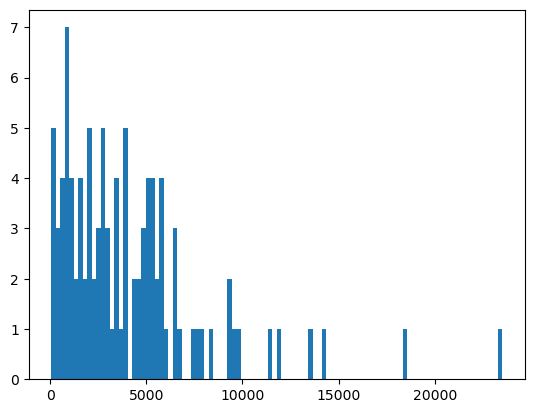

In [17]:
plt.hist(np.random.exponential(scale=(10)*365, size=100), bins=100)